In [43]:
import pandas as pd
import numpy as np 

In [44]:
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv(r'C:\Users\rakes\Documents\Raq files\Data Science\Data sets\clevelanda.csv')
data.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [14]:
data['updated_class'] = data['class'].apply(lambda x:1 if x>0 else 0)


In [15]:
data.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class', 'updated_class'],
      dtype='object')

In [17]:
data.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class,updated_class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


In [18]:
X = data.iloc[:,:13]
print(X.head())

   age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0   63       1   1       145   233    1        2      150      0      2.3   
1   67       1   4       160   286    0        2      108      1      1.5   
2   67       1   4       120   229    0        2      129      1      2.6   
3   37       1   3       130   250    0        0      187      0      3.5   
4   41       0   2       130   204    0        2      172      0      1.4   

   slope ca thal  
0      3  0    6  
1      2  3    3  
2      2  2    7  
3      3  0    3  
4      1  0    3  


In [19]:
y = data.iloc[:,-1]
print(y.head())

0    0
1    1
2    1
3    0
4    0
Name: updated_class, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2) 

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [22]:
data.isnull().sum()

age              0
gender           0
cp               0
trestbps         0
chol             0
fps              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
class            0
updated_class    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   gender         303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fps            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  class          303 non-null    int64  
 14  updated_class  303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [24]:
data.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class,updated_class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


In [25]:
data['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [26]:
data['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [27]:
data['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [28]:
data['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [29]:
data = data.replace('?', np.nan)

In [30]:
data['thal'].unique()

array(['6', '3', '7', nan], dtype=object)

In [31]:
data['ca'].unique()

array(['0', '3', '2', '1', nan], dtype=object)

In [32]:
data = data.dropna()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            297 non-null    int64  
 1   gender         297 non-null    int64  
 2   cp             297 non-null    int64  
 3   trestbps       297 non-null    int64  
 4   chol           297 non-null    int64  
 5   fps            297 non-null    int64  
 6   restecg        297 non-null    int64  
 7   thalach        297 non-null    int64  
 8   exang          297 non-null    int64  
 9   oldpeak        297 non-null    float64
 10  slope          297 non-null    int64  
 11  ca             297 non-null    object 
 12  thal           297 non-null    object 
 13  class          297 non-null    int64  
 14  updated_class  297 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 37.1+ KB


In [34]:
data['ca']= pd.to_numeric(data['ca'])
data['thal']= pd.to_numeric(data['thal'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            297 non-null    int64  
 1   gender         297 non-null    int64  
 2   cp             297 non-null    int64  
 3   trestbps       297 non-null    int64  
 4   chol           297 non-null    int64  
 5   fps            297 non-null    int64  
 6   restecg        297 non-null    int64  
 7   thalach        297 non-null    int64  
 8   exang          297 non-null    int64  
 9   oldpeak        297 non-null    float64
 10  slope          297 non-null    int64  
 11  ca             297 non-null    int64  
 12  thal           297 non-null    int64  
 13  class          297 non-null    int64  
 14  updated_class  297 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 37.1 KB


In [35]:
X = data.iloc[:,:13]
print(X.head())

   age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0   63       1   1       145   233    1        2      150      0      2.3   
1   67       1   4       160   286    0        2      108      1      1.5   
2   67       1   4       120   229    0        2      129      1      2.6   
3   37       1   3       130   250    0        0      187      0      3.5   
4   41       0   2       130   204    0        2      172      0      1.4   

   slope  ca  thal  
0      3   0     6  
1      2   3     3  
2      2   2     7  
3      3   0     3  
4      1   0     3  


In [36]:
y = data.iloc[:,-1]
print(y.head())

0    0
1    1
2    1
3    0
4    0
Name: updated_class, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=40) 

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model = DecisionTreeClassifier(random_state=40)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [45]:
from sklearn.tree import plot_tree

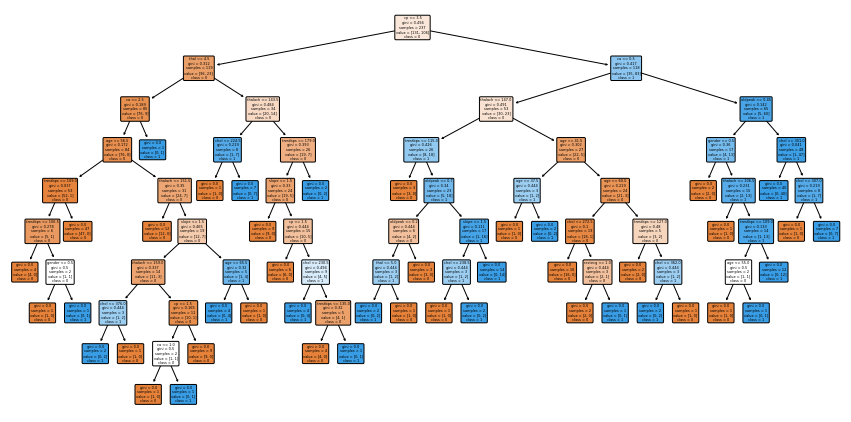

In [47]:
plt.figure(figsize= (15,7.5))
plot_tree(model,filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns);


In [48]:
from sklearn.metrics import plot_confusion_matrix

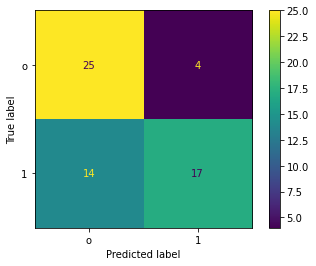

In [49]:
plot_confusion_matrix(model,X_test,y_test, display_labels=['o', '1'])

In [50]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [51]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7

In [52]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [55]:
ccp_alphas

array([0.        , 0.00275987, 0.00383583, 0.00391802, 0.00397121,
       0.00399734, 0.0041315 , 0.00471908, 0.00562588, 0.00562588,
       0.00562588, 0.00659397, 0.00660259, 0.00675105, 0.00675105,
       0.00679124, 0.00738397, 0.00802905, 0.00824638, 0.0088842 ,
       0.00976415, 0.01377195, 0.01894438, 0.01917527, 0.02874542,
       0.05894001, 0.13010507])

In [56]:
models=[]
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train,y_train)
    models.append(model)
    
    

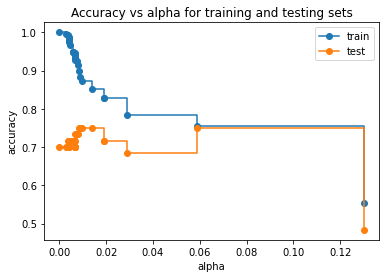

In [59]:
train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [81]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002759865191200273, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0038358266206367474, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003918022905364678, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003971208736659222, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003997335109926717, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004131504922644168, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0047190761714412605, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005625879043600563, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005625879043600563, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005625879043600563, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0065939686192850785, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0066025941553367745, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0067510548523206735, random_state=0),
 Deci

In [89]:
model = DecisionTreeClassifier(random_state=40, ccp_alpha=0.00976414584009521)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00976414584009521, random_state=40)

In [90]:
y_pred = model.predict(X_test)
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.75

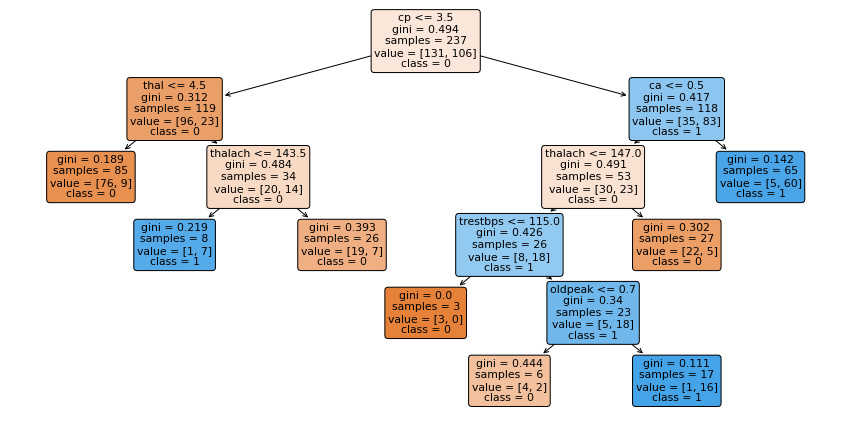

In [91]:
plt.figure(figsize= (15,7.5))
plot_tree(model,filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns);


In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train,y_train,cv=5)
df = pd.DataFrame(data={"tree":range(5), "scores": scores})
df

,tree,scores
0,0,0.854167
1,1,0.770833
2,2,0.702128
3,3,0.765957
4,4,0.765957


In [93]:
alpha_models=[]
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha )
    scores = cross_val_score(model, X_train, y_train,cv=5)
    alpha_models.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_models, columns=['alpha', 'mean','std'])
alpha_results

,alpha,mean,std
0,0.000000,0.708599,0.044345
1,0.002760,0.708599,0.044345
2,0.003836,0.712855,0.044541
3,0.003918,0.712855,0.044541
4,0.003971,0.712855,0.044541
5,0.003997,0.712855,0.044541
6,0.004132,0.712855,0.044541
7,0.004719,0.712855,0.044541
8,0.005626,0.742376,0.050019
9,0.005626,0.742376,0.050019


<AxesSubplot:xlabel='alpha'>

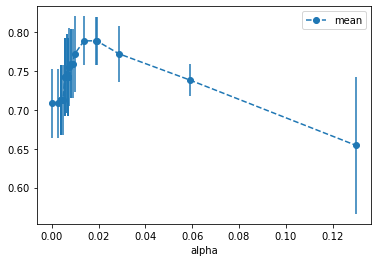

In [94]:
alpha_results.plot(x= 'alpha',y= 'mean', yerr = 'std', marker= 'o', linestyle = '--')

In [97]:
model = DecisionTreeClassifier(random_state=40, ccp_alpha=0.019175)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.019175, random_state=40)

In [98]:
y_pred = model.predict(X_test)
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7166666666666667

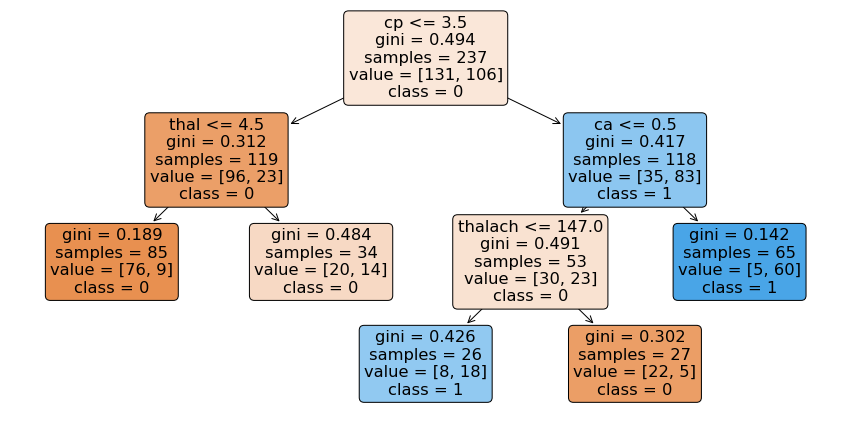

In [99]:
plt.figure(figsize= (15,7.5))
plot_tree(model,filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns);


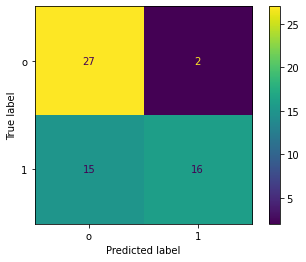

In [101]:
plot_confusion_matrix(model,X_test,y_test, display_labels=['o', '1'])